In [ ]:
 import numpy as np                                     # linear alegbra
import pandas as pd                                    # data processing
import seaborn as sns                                  # ploting graphs
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder         # converting categorical to numerical
from sklearn.preprocessing import StandardScaler       # scaling
from sklearn.model_selection import train_test_split   # spiltting the data
from sklearn.linear_model import LogisticRegression    # model building algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV       # hyperparameter tuning
                                                       # evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import warnings                                        # for ingore warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install plotly

In [ ]:
pip install missingno

In [ ]:
import matplotlib.style as style
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
from plotly import tools
from imblearn.over_sampling import SMOTE
import itertools

In [ ]:
import missingno as msno

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PGA 23/Advanced ML/application_record.csv')
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(df.shape)
df.describe()

(438557, 18)


,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:
df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [ ]:
a=len(df)
b=len(df.ID.unique())

print(f'Number of datapoints for application records: {a}')
print(f'Number of unique in dataset: {b}')
print(f'Number of Duplicated records: {a-b}')

Number of datapoints for application records: 438557
Number of unique in dataset: 438510
Number of Duplicated records: 47


In [ ]:
df.duplicated().sum()

0

The number of appication records adn unique ID's is not a match, hence the values must be duplicated.

In [ ]:
df_1 = pd.read_csv('/content/drive/MyDrive/PGA 23/Advanced ML/credit_record.csv')
df_1

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


Before removing duplicating data

In [ ]:
len(set(df_1['ID']).intersection(set(df['ID'])))

36457

The number of unique ID's in the dataset is not equal. There are fewer customers than application in the credit record dataserts. The intersection is 36,457 customers.

After removing duplicated data

In [ ]:
print(f'Duplicates in application data: {df.iloc[:,1:].duplicated().sum()}, {np.round(100*df.iloc[:,1:].duplicated().sum()/len(df),1)}%')
print('----')
print(f'Duplicates in record data: {df_1.iloc[:,:].duplicated().sum()}, {np.round(100*df_1.iloc[:,:].duplicated().sum()/len(df_1),1)}%')

Duplicates in application data: 348472, 79.5%
----
Duplicates in record data: 0, 0.0%


In [ ]:
print(f'Duplicates in application data: {df.iloc[:,1:].duplicated().sum()},'
      f' ({np.round(100*df.iloc[:,1:].duplicated().sum()/len(df),1)}%)')
print('----')
print(f'Duplicates in record data: {df_1.iloc[:,1:].duplicated().sum()},'
      f' ({np.round(100*df_1.iloc[:,1:].duplicated().sum()/len(df_1),1)}%)')


Duplicates in application data: 348472, (79.5%)
----
Duplicates in record data: 1048112, (100.0%)


Droping  duplicates

In [ ]:
#drop data
df=df.drop_duplicates(subset=df.columns[1:], keep='first')

In [ ]:
df.shape

(90085, 18)

In [ ]:
len(set(df_1['ID']).intersection(set(df['ID'])))

9709

The number of unique in the two datasets is not equal. There are fewer customers than applications in the credit record dataset. The intersection is 9709 customers.

#### Finding the cardinality in the data

Cardinality refers to the distinctiveness or uniqueness fo values in a dataset or database column. It repersent the number of unique values in column or a set of columns

In [ ]:
unique_count = pd.DataFrame.from_records([(col, df[col].nunique()) for col in df.columns],
                                         columns=['Column_name','Num_unique']).sort_values(by=['Num_unique'])

unique_count

,Column_name,Num_unique
12,FLAG_MOBIL,1
1,CODE_GENDER,2
2,FLAG_OWN_CAR,2
3,FLAG_OWN_REALTY,2
15,FLAG_EMAIL,2
14,FLAG_PHONE,2
13,FLAG_WORK_PHONE,2
8,NAME_FAMILY_STATUS,5
6,NAME_INCOME_TYPE,5
7,NAME_EDUCATION_TYPE,5


In [ ]:
unique_count_1 = pd.DataFrame.from_records([(col, df_1[col].nunique()) for col in df_1.columns],
                                         columns=['Column_name','Num_unique']).sort_values(by=['Num_unique'])

unique_count_1

,Column_name,Num_unique
2,STATUS,8
1,MONTHS_BALANCE,61
0,ID,45985


In [ ]:
df.FLAG_MOBIL.unique()

array([1])

FLag_mobile features has only one value i.e., all custumers have mobiles. Hence deleting this Feature.

In [ ]:
df.drop(['FLAG_MOBIL'],axis=1, inplace=True)

df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,NaN,1.0
10,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,Accountants,2.0


In [ ]:
df.shape

(90085, 17)

#### Handling Missing values

In [ ]:
df.isnull().sum()/len(df)*100

ID                      0.000000
CODE_GENDER             0.000000
FLAG_OWN_CAR            0.000000
FLAG_OWN_REALTY         0.000000
CNT_CHILDREN            0.000000
AMT_INCOME_TOTAL        0.000000
NAME_INCOME_TYPE        0.000000
NAME_EDUCATION_TYPE     0.000000
NAME_FAMILY_STATUS      0.000000
NAME_HOUSING_TYPE       0.000000
DAYS_BIRTH              0.000000
DAYS_EMPLOYED           0.000000
FLAG_WORK_PHONE         0.000000
FLAG_PHONE              0.000000
FLAG_EMAIL              0.000000
OCCUPATION_TYPE        30.501193
CNT_FAM_MEMBERS         0.000000
dtype: float64

Text(0.5, 1.0, 'Missing data for applicaiton records dataset')

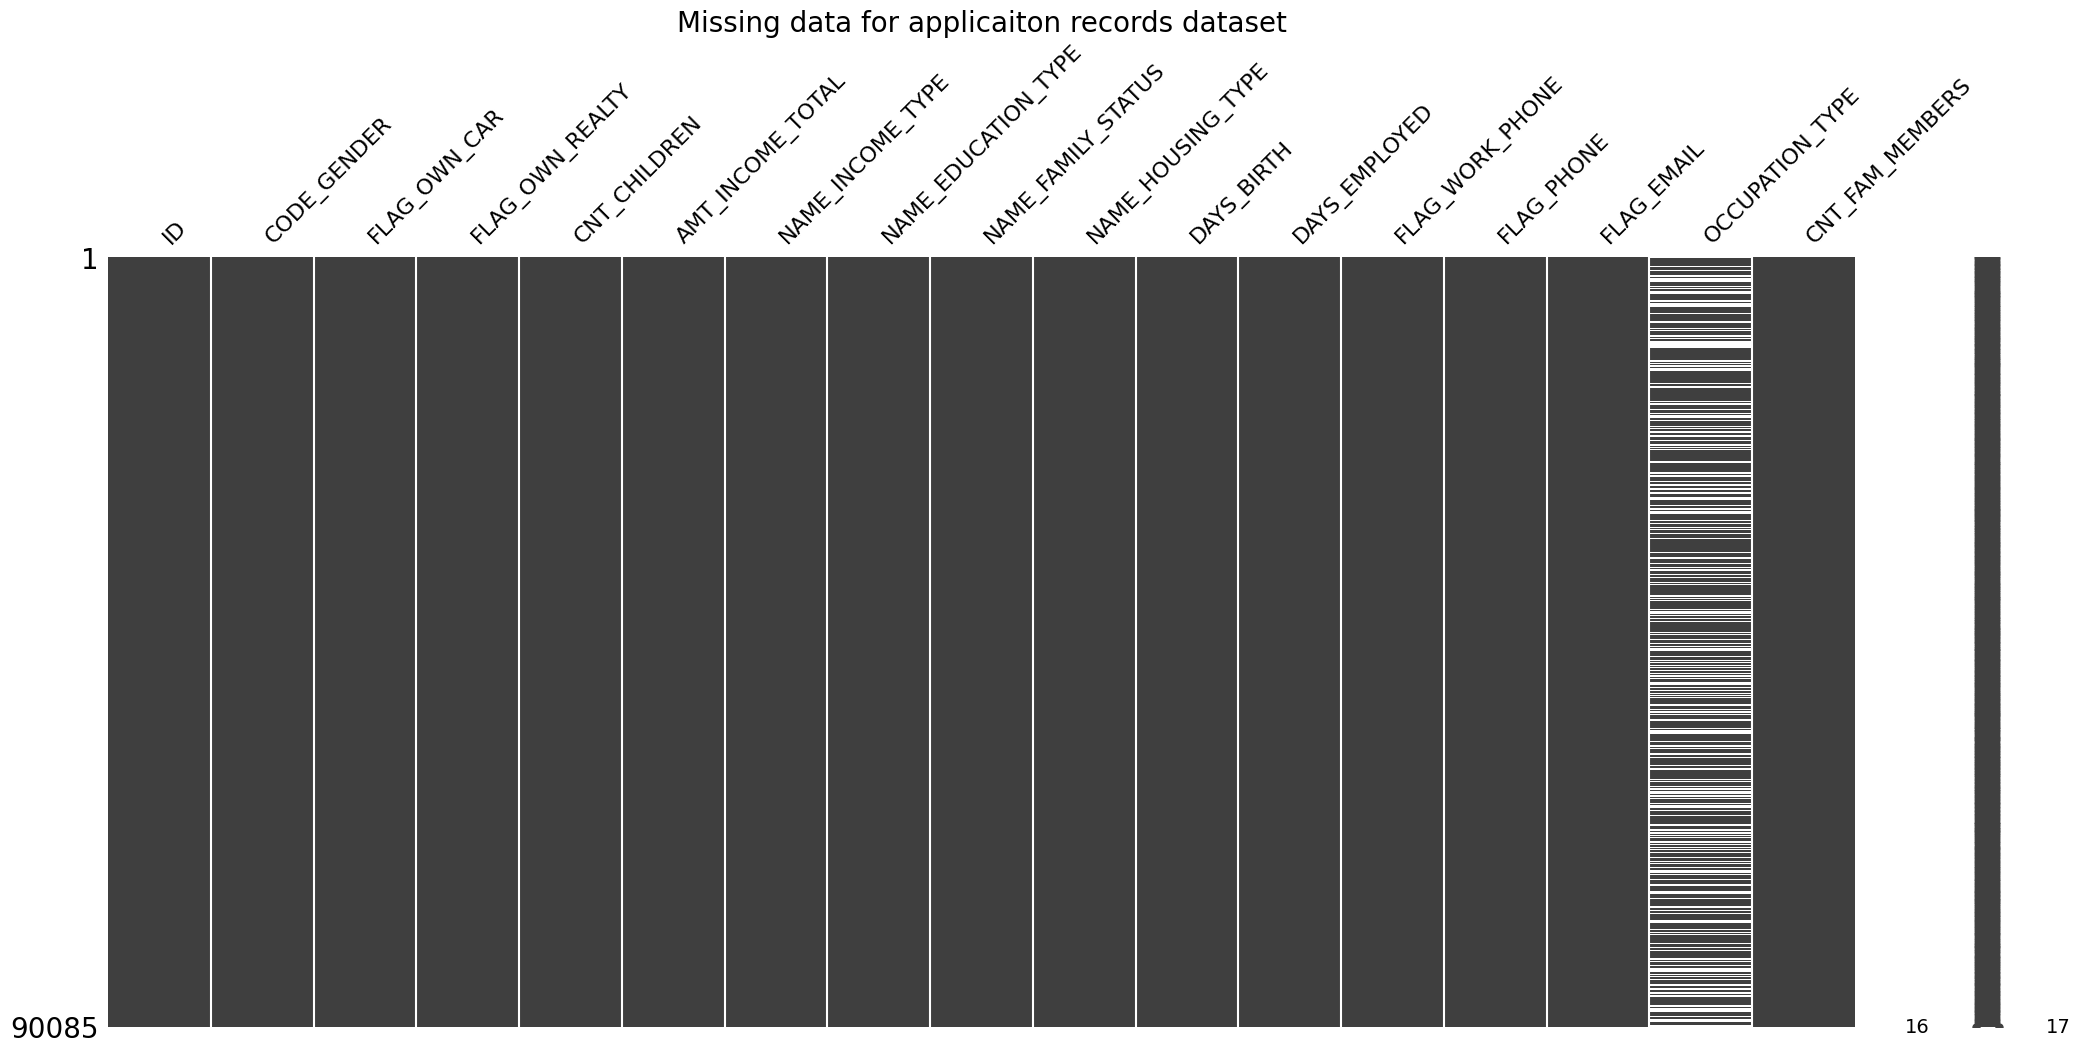

In [ ]:
missing = msno.matrix(df)
missing.set_title('Missing data for applicaiton records dataset',fontsize=20)

In [ ]:
df_1.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

Text(0.5, 1.0, 'Missing data for Records dataset')

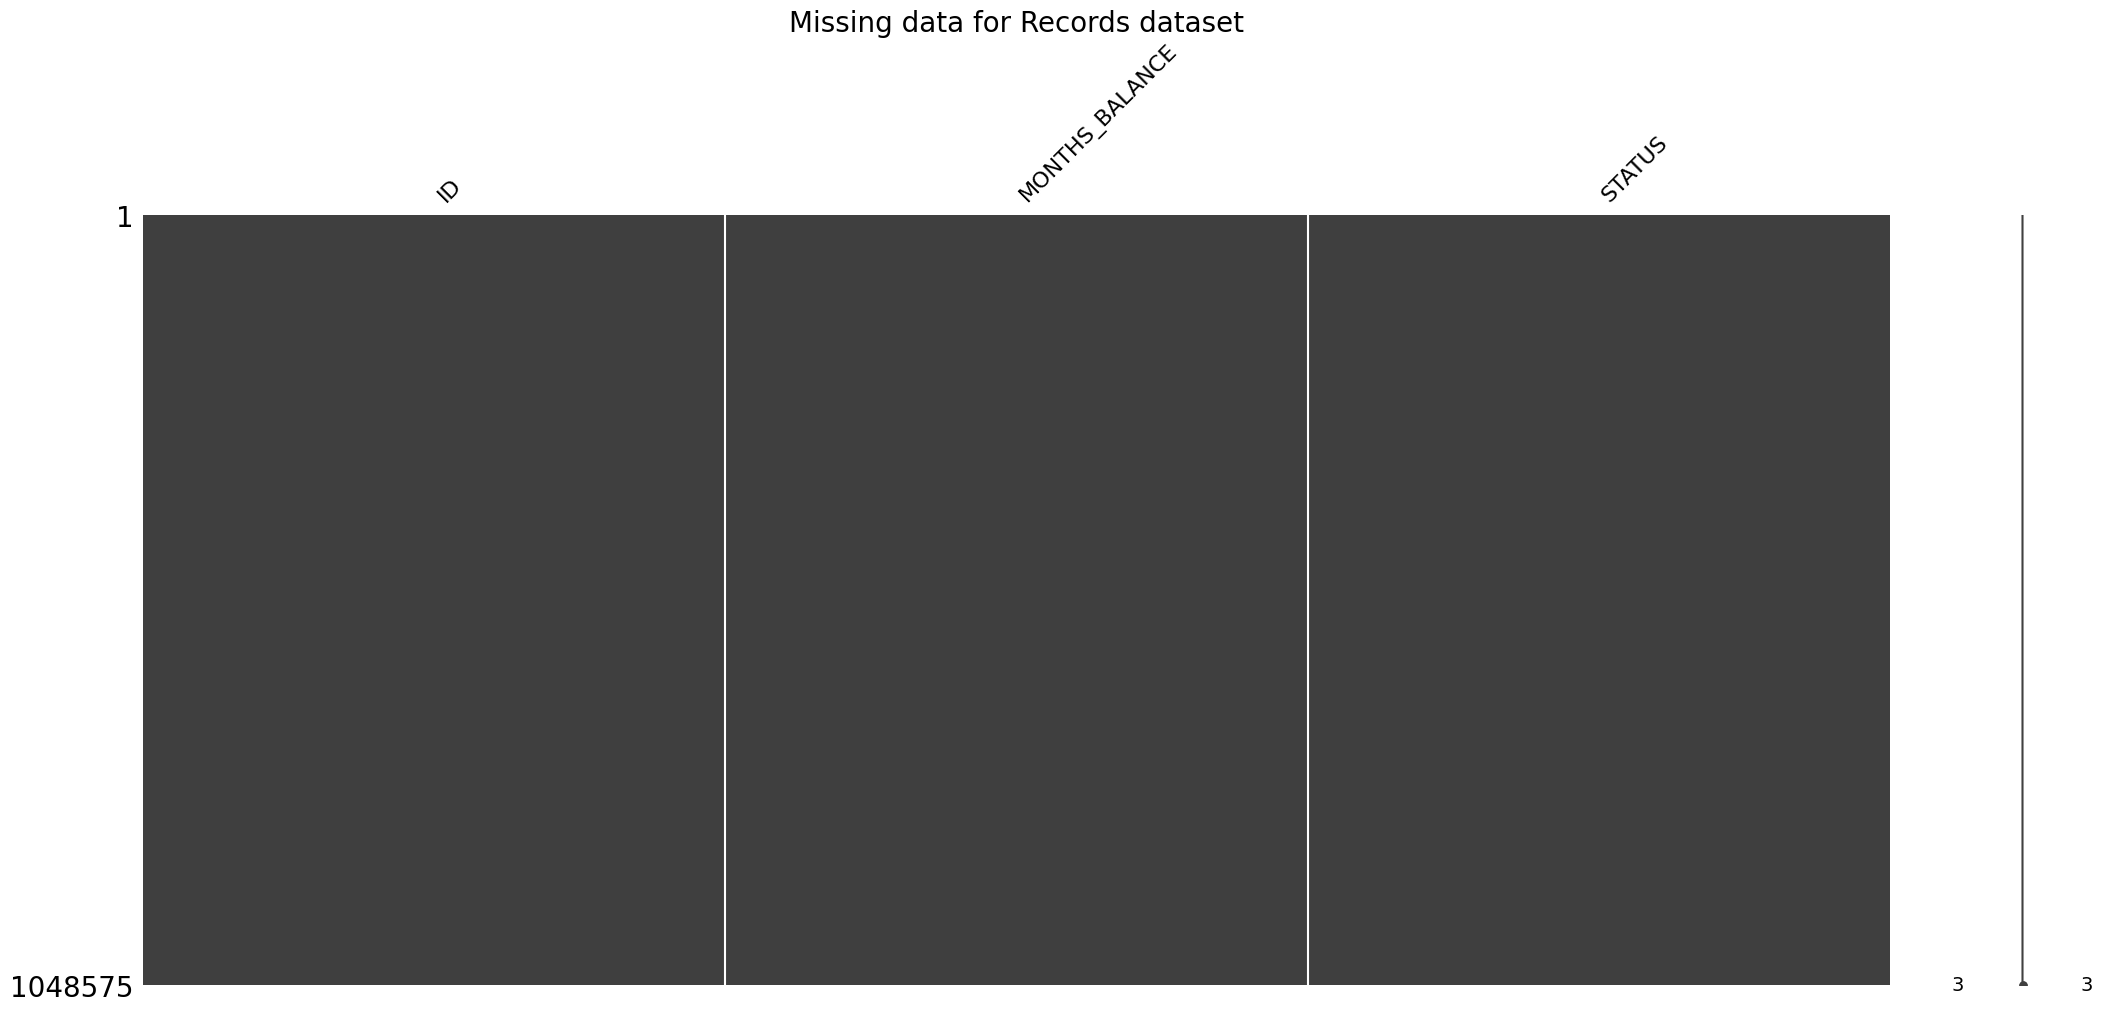

In [ ]:
missing_1 = msno.matrix(df_1)
missing_1.set_title('Missing data for Records dataset',fontsize=20)

AS we can observe from above "OCCUPATION_TYPE" is the only column from application data having large set of missing values.
Appropriate handling of them can help ensures the integrity and acc of analyses and modeling results.

In [ ]:
df.OCCUPATION_TYPE.value_counts()

Laborers                 16624
Sales staff               9123
Core staff                8091
Managers                  6675
Drivers                   5860
High skill tech staff     3357
Accountants               3034
Medicine staff            2484
Cooking staff             1764
Security staff            1740
Cleaning staff            1222
Private service staff      750
Low-skill Laborers         569
Secretaries                412
Waiters/barmen staff       393
Realty agents              218
HR staff                   167
IT staff                   125
Name: OCCUPATION_TYPE, dtype: int64

In [ ]:
# filling missing value
df.OCCUPATION_TYPE.fillna(value='Other', inplace=True)

As dropping the missing values completely can lead to huge loss. So instead of dropping we will try to fill the missing values as "Other", so the data loss can be prevented and missing values will also get handed appropriatley.

In [ ]:
df_1.STATUS.value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

Converting data in proper format

In [ ]:
df_1['target'] = df_1['STATUS']
df_1['target'].replace('X',0, inplace = True)
df_1['target'].replace('C',0, inplace = True)
df_1['target'] = df_1['target'].astype(int)
df_1.loc[df_1['target']>=1, 'target']=1

In [ ]:
df_1.target.value_counts()

0    1034381
1      14194
Name: target, dtype: int64

In [ ]:
print("Number of datapoints for application records: {}".format(len(df_1)))
print("Number of unique datapoints in records: {}".format(len(df_1.ID.unique())))

Number of datapoints for application records: 1048575
Number of unique datapoints in records: 45985


In [ ]:
df_2 = pd.DataFrame(df_1.groupby(['ID'])['target'].agg(max)).reset_index()
df_2

,ID,target
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0
...,...,...
45980,5150482,0
45981,5150483,0
45982,5150484,0
45983,5150485,0


In [ ]:
new_df= pd.merge(df, df_2, how='inner', on=['ID'])
new_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,1
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,Other,1.0,0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,Accountants,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,-20600,-198,0,0,0,Laborers,2.0,1
9705,5149055,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15837,-2694,1,1,0,Other,2.0,1
9706,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-19101,-1721,0,0,0,Other,2.0,1
9707,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,0,1,1,Medicine staff,2.0,1


In [ ]:
new_df.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
target                 0
dtype: int64

In [ ]:
#extracting how months account has been open for
start_df = pd.DataFrame(df_1.groupby(['ID'])['MONTHS_BALANCE'].agg(min)).reset_index()

#rename column
start_df.rename(columns={'MONTHS_BALANCE':'ACCOUNT_LENGTH'},inplace=True)

#make enteries positive
start_df['ACCOUNT_LENGTH'] = -start_df['ACCOUNT_LENGTH']

In [ ]:
start_df

,ID,ACCOUNT_LENGTH
0,5001711,3
1,5001712,18
2,5001713,21
3,5001714,14
4,5001715,59
...,...,...
45980,5150482,28
45981,5150483,17
45982,5150484,12
45983,5150485,1


In [ ]:
#Merge dataframe on ID
new_df = pd.merge(new_df, start_df, how ='inner', on = ['ID'])
new_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,ACCOUNT_LENGTH
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,1,15
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,0,29
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,0,4
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,Other,1.0,0,20
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,Accountants,2.0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,-20600,-198,0,0,0,Laborers,2.0,1,20
9705,5149055,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15837,-2694,1,1,0,Other,2.0,1,19
9706,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-19101,-1721,0,0,0,Other,2.0,1,21
9707,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,0,1,1,Medicine staff,2.0,1,32


In [ ]:
new_df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,target,ACCOUNT_LENGTH
count,9.709000e+03,9709.000000,9.709000e+03,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000
mean,5.076105e+06,0.422804,1.812282e+05,-15991.811618,61732.846328,0.217427,0.287671,0.087548,2.182614,0.132145,27.270059
std,4.080270e+04,0.767019,9.927731e+04,4246.224468,139656.322958,0.412517,0.452700,0.282650,0.932918,0.338666,16.648057
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,5.036955e+06,0.000000,1.125000e+05,-19565.000000,-2995.000000,0.000000,0.000000,0.000000,2.000000,0.000000,13.000000
50%,5.069449e+06,0.000000,1.575000e+05,-15611.000000,-1374.000000,0.000000,0.000000,0.000000,2.000000,0.000000,26.000000
75%,5.112986e+06,1.000000,2.250000e+05,-12440.000000,-339.000000,0.000000,1.000000,0.000000,3.000000,0.000000,41.000000
max,5.150479e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.000000,1.000000,1.000000,20.000000,1.000000,60.000000


In [ ]:
df.DAYS_BIRTH

0        -12005
2        -21474
3        -19110
7        -22464
10       -16872
          ...  
438541   -13510
438545   -18832
438547   -10966
438552   -22717
438553   -15939
Name: DAYS_BIRTH, Length: 90085, dtype: int64

In [ ]:
# create age feature since it is in negative
new_df['AGE_YEARS']= round(-new_df['DAYS_BIRTH']/365.2425,0)
# the number 365.2425 is used to represent the average length of a tropical year,
#which is the time it takes for the earth to complete one orbit around sun.

In [ ]:
new_df.AGE_YEARS

0       33.0
1       59.0
2       52.0
3       62.0
4       46.0
        ... 
9704    56.0
9705    43.0
9706    52.0
9707    34.0
9708    25.0
Name: AGE_YEARS, Length: 9709, dtype: float64

In [ ]:
# since day_birth and age_years gives the same info, hence dropping Day_birth

new_df.drop(['DAYS_BIRTH'], axis=1, inplace=True)
new_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,ACCOUNT_LENGTH,AGE_YEARS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,0,0,Other,2.0,1,15,33.0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,0,0,0,Security staff,2.0,0,29,59.0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,0,1,1,Sales staff,1.0,0,4,52.0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,365243,0,0,0,Other,1.0,0,20,62.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-769,1,1,1,Accountants,2.0,0,5,46.0


In [ ]:
#create unemployed indicator

new_df['UNEMPLOYED'] = 0
new_df.loc[-new_df['DAYS_EMPLOYED']<0,'UNEMPLOYED'] = 1
new_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,ACCOUNT_LENGTH,AGE_YEARS,UNEMPLOYED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,0,0,Other,2.0,1,15,33.0,0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,0,0,0,Security staff,2.0,0,29,59.0,0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,0,1,1,Sales staff,1.0,0,4,52.0,0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,365243,0,0,0,Other,1.0,0,20,62.0,1
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-769,1,1,1,Accountants,2.0,0,5,46.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,-198,0,0,0,Laborers,2.0,1,20,56.0,0
9705,5149055,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-2694,1,1,0,Other,2.0,1,19,43.0,0
9706,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-1721,0,0,0,Other,2.0,1,21,52.0,0
9707,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-1325,0,1,1,Medicine staff,2.0,1,32,34.0,0


As we can observe the no. of the days the applicant working i.e., "DAYS_EMPLOYED" is not in proper format. So we will try to convert it in proper format.

In [ ]:
#create year employed feature
new_df['YEARS_EMPLOYED'] = round(-new_df['DAYS_EMPLOYED']/365.2425)
new_df.loc[new_df['YEARS_EMPLOYED']<0,'YEARS_EMPLOYED']=0
new_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,ACCOUNT_LENGTH,AGE_YEARS,UNEMPLOYED,YEARS_EMPLOYED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,Other,2.0,1,15,33.0,0,12.0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Security staff,2.0,0,29,59.0,0,3.0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,0,4,52.0,0,8.0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,...,0,0,0,Other,1.0,0,20,62.0,1,0.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,...,1,1,1,Accountants,2.0,0,5,46.0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,...,0,0,0,Laborers,2.0,1,20,56.0,0,1.0
9705,5149055,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,1,1,0,Other,2.0,1,19,43.0,0,7.0
9706,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Other,2.0,1,21,52.0,0,5.0
9707,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,0,1,1,Medicine staff,2.0,1,32,34.0,0,4.0


In [ ]:
pd.set_option('display.max_columns',None)
new_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,ACCOUNT_LENGTH,AGE_YEARS,UNEMPLOYED,YEARS_EMPLOYED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,0,0,Other,2.0,1,15,33.0,0,12.0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,0,0,0,Security staff,2.0,0,29,59.0,0,3.0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,0,1,1,Sales staff,1.0,0,4,52.0,0,8.0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,365243,0,0,0,Other,1.0,0,20,62.0,1,0.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-769,1,1,1,Accountants,2.0,0,5,46.0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,-198,0,0,0,Laborers,2.0,1,20,56.0,0,1.0
9705,5149055,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-2694,1,1,0,Other,2.0,1,19,43.0,0,7.0
9706,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-1721,0,0,0,Other,2.0,1,21,52.0,0,5.0
9707,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-1325,0,1,1,Medicine staff,2.0,1,32,34.0,0,4.0


In [ ]:
new_df.drop('DAYS_EMPLOYED',axis=1, inplace=True)
new_df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,target,ACCOUNT_LENGTH,AGE_YEARS,UNEMPLOYED,YEARS_EMPLOYED
count,9.709000e+03,9709.000000,9.709000e+03,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000
mean,5.076105e+06,0.422804,1.812282e+05,0.217427,0.287671,0.087548,2.182614,0.132145,27.270059,43.787414,0.174683,5.678649
std,4.080270e+04,0.767019,9.927731e+04,0.412517,0.452700,0.282650,0.932918,0.338666,16.648057,11.636328,0.379716,6.352859
min,5.008804e+06,0.000000,2.700000e+04,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000
25%,5.036955e+06,0.000000,1.125000e+05,0.000000,0.000000,0.000000,2.000000,0.000000,13.000000,34.000000,0.000000,1.000000
50%,5.069449e+06,0.000000,1.575000e+05,0.000000,0.000000,0.000000,2.000000,0.000000,26.000000,43.000000,0.000000,4.000000
75%,5.112986e+06,1.000000,2.250000e+05,0.000000,1.000000,0.000000,3.000000,0.000000,41.000000,54.000000,0.000000,8.000000
max,5.150479e+06,19.000000,1.575000e+06,1.000000,1.000000,1.000000,20.000000,1.000000,60.000000,69.000000,1.000000,43.000000


In [ ]:
new_df = new_df.rename(columns={'CODE_GENDER': 'Gender', 'FLAG_OWN_CAR': 'Own_car',
                               'FLAG_OWN_REALTY':'Own_property','CNT_CHILDREN':'Num_children',
                               'AMT_INCOME_TOTAL':'Total_income','NAME_INCOME_TYPE':'Income_type',
                               'NAME_EDUCATION_TYPE':'Education_type','NAME_FAMILY_STATUS':'Family_status',
                               'NAME_HOUSING_TYPE':'Housing_type','FLAG_WORK_PHONE':'Work_phone',
                               'FLAG_PHONE':'Phone','FLAG_EMAIL':'Email','OCCUPATION_TYPE':'Occupation_type',
                               'CNT_FAM_MEMBERS':'Num_family','target':'Target','ACCOUNT_LENGTH':'Account_length',
                                'AGE_YEARS':'Age','UNEMPLOYED':'Unemployed','YEARS_EMPLOYED':'Years_employed'})

In [ ]:
new_df

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,Work_phone,Phone,Email,Occupation_type,Num_family,Target,Account_length,Age,Unemployed,Years_employed
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2.0,1,15,33.0,0,12.0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2.0,0,29,59.0,0,3.0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,0,4,52.0,0,8.0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,0,0,0,Other,1.0,0,20,62.0,1,0.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,1,1,1,Accountants,2.0,0,5,46.0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,0,0,0,Laborers,2.0,1,20,56.0,0,1.0
9705,5149055,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,1,0,Other,2.0,1,19,43.0,0,7.0
9706,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Other,2.0,1,21,52.0,0,5.0
9707,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,0,1,1,Medicine staff,2.0,1,32,34.0,0,4.0


In [ ]:
sns.set_context("notebook",font_scale=.7,rc={"grid.linewidth": 0.1,'patch.linewidth': 0.0,
    "axes.grid":True,
    "grid.linestyle": "-",
    "axes.titlesize" : 13,
    "figure.autolayout":True})

palette_1 = ['#FF5E5B','#EC9B9A','#00CECB','#80DE99','#C0E680','#FFED66']

sns.set_palette(sns.color_palette(sns.color_palette(palette_1)))

<Figure size 1000x1000 with 0 Axes>

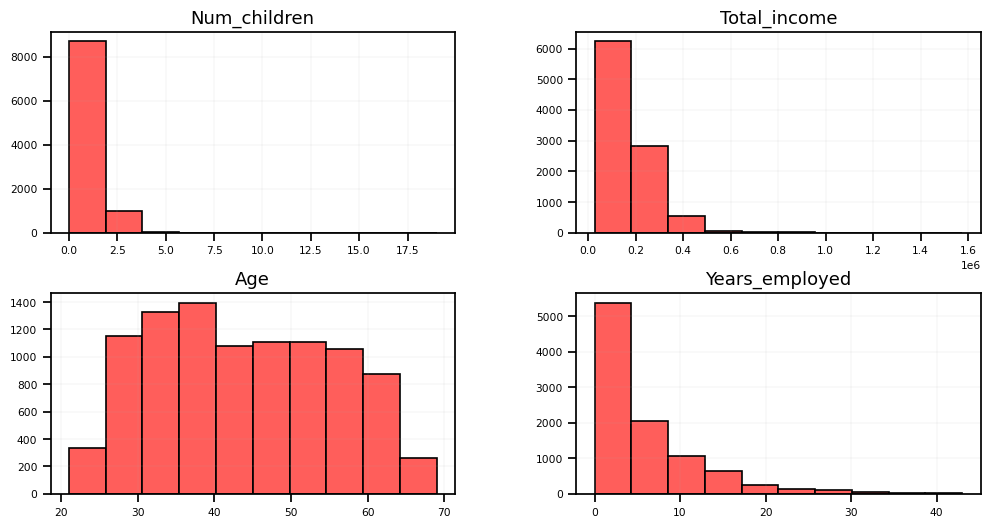

In [ ]:
plt.figure(figsize=(10,10))
cols_to_plot = ["Num_children","Total_income","Age","Years_employed"]
new_df[cols_to_plot].hist(edgecolor='black', linewidth = 1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

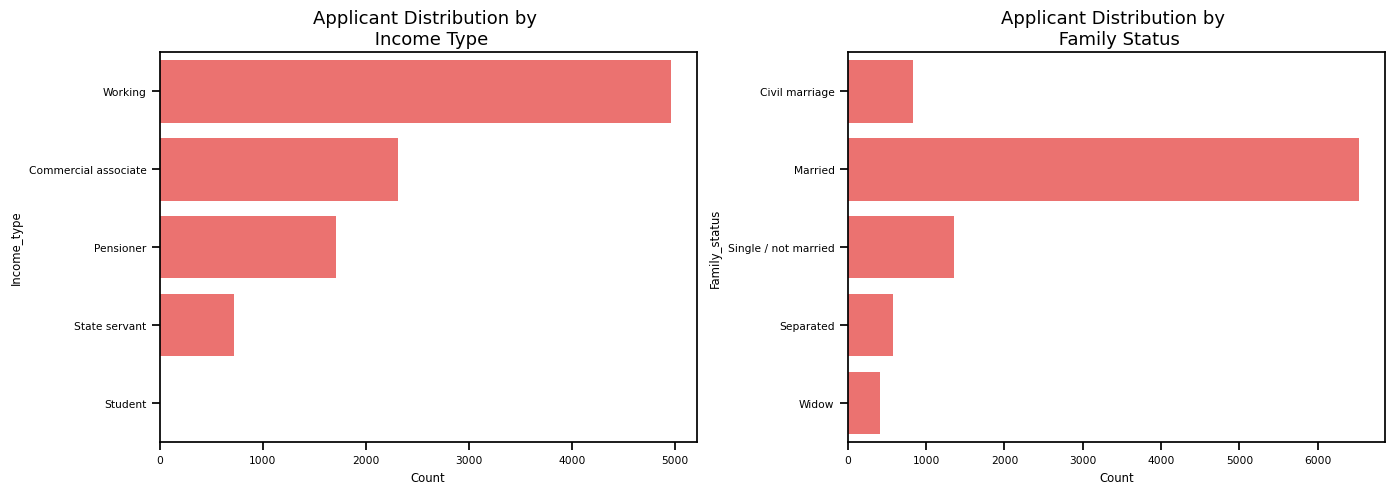

In [ ]:
fig, axes = plt.subplots(1,2)

g1=sns.countplot(y=new_df.Income_type,linewidth=1.2, ax=axes[0])
g1.set_title("Applicant Distribution by \n Income Type")
g1.set_xlabel("Count")

g2=sns.countplot(y=new_df.Family_status,linewidth=1.2, ax=axes[1])
g2.set_title("Applicant Distribution by \n Family Status")
g2.set_xlabel("Count")

fig.set_size_inches(14,5)

plt.tight_layout()
plt.show()

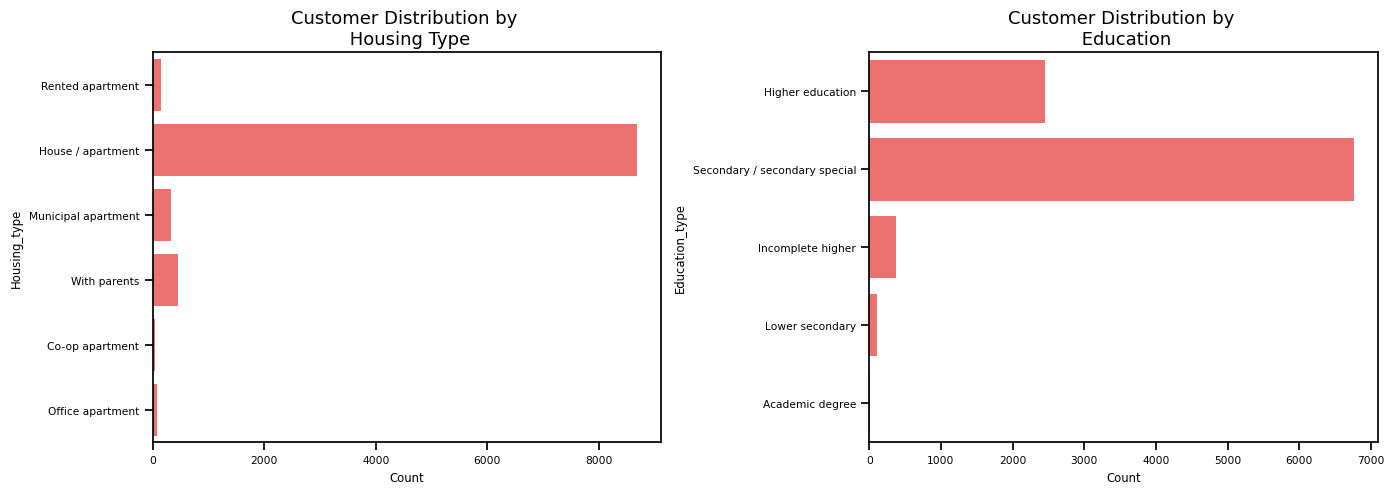

In [ ]:
fig, axes = plt.subplots(1,2)

g1=sns.countplot(y=new_df.Housing_type,linewidth=1.2, ax=axes[0])
g1.set_title("Customer Distribution by \n Housing Type")
g1.set_xlabel("Count")

g2=sns.countplot(y=new_df.Education_type,linewidth=1.2, ax=axes[1])
g2.set_title("Customer Distribution by \n Education")
g2.set_xlabel("Count")

fig.set_size_inches(14,5)

plt.tight_layout()
plt.show()

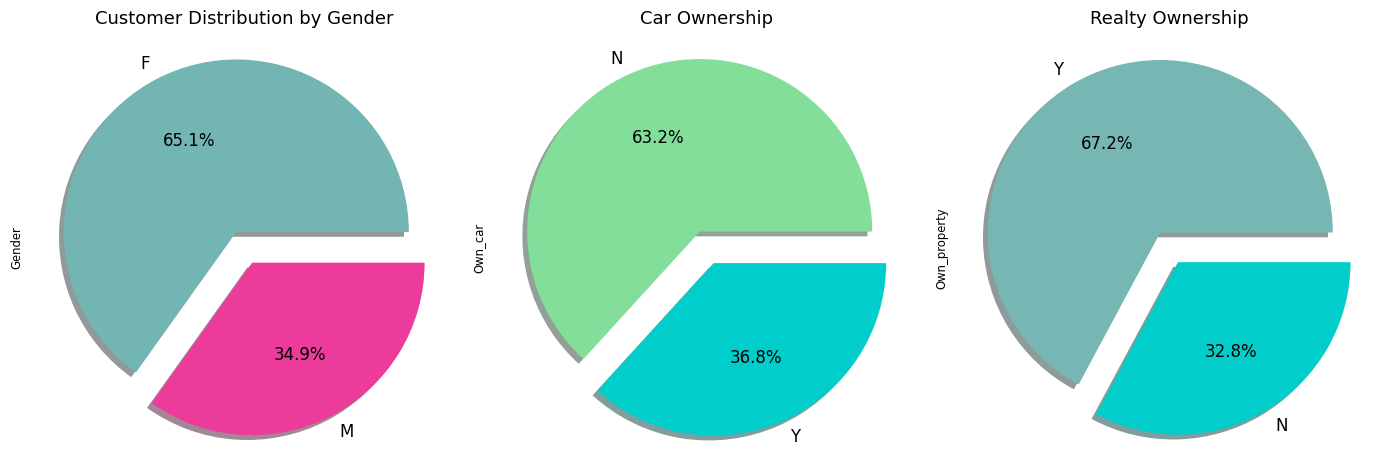

In [ ]:
fig, axes = plt.subplots(1,3)

g1= new_df['Gender'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=["#73B5B3","#EC3B9A"],textprops = {'fontsize':12}, ax=axes[0])
g1.set_title("Customer Distribution by Gender")

g2= new_df['Own_car'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#82DE99","#01CECB"],textprops = {'fontsize':12}, ax=axes[1])
g2.set_title("Car Ownership")

g3= new_df['Own_property'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#76B6B3","#01CECB"],textprops = {'fontsize':12}, ax=axes[2])
g3.set_title("Realty Ownership")

fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()

In [ ]:
object_columns = new_df.columns[new_df.dtypes == 'object'].tolist()
#object columns in dataset

unique_counts= pd.DataFrame.from_records([(col,new_df[object_columns][col].nunique())
                                          for col in new_df[object_columns].columns],
                                        columns=['Column_Name','Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts
#unique counts for object columns

,Column_Name,Num_Unique
0,Gender,2
1,Own_car,2
2,Own_property,2
3,Income_type,5
4,Education_type,5
5,Family_status,5
6,Housing_type,6
7,Occupation_type,19


In [ ]:
#checking unique values from categroical columns

for i in new_df.columns[(new_df.dtypes == 'object').values].tolist():
    print(i,'\n')
    print(new_df[i].value_counts())
    print('----------------------')

Gender 

F    6323
M    3386
Name: Gender, dtype: int64
----------------------
Own_car 

N    6139
Y    3570
Name: Own_car, dtype: int64
----------------------
Own_property 

Y    6520
N    3189
Name: Own_property, dtype: int64
----------------------
Income_type 

Working                 4960
Commercial associate    2312
Pensioner               1712
State servant            722
Student                    3
Name: Income_type, dtype: int64
----------------------
Education_type 

Secondary / secondary special    6761
Higher education                 2457
Incomplete higher                 371
Lower secondary                   114
Academic degree                     6
Name: Education_type, dtype: int64
----------------------
Family_status 

Married                 6530
Single / not married    1359
Civil marriage           836
Separated                574
Widow                    410
Name: Family_status, dtype: int64
----------------------
Housing_type 

House / apartment      8684
With pare

In [ ]:
#encode binary featuers
new_df['Gender'] = new_df['Gender'].replace(['F','M'],[0,1])
new_df['Own_car'] = new_df['Own_car'].replace(['Y','N'],[1,0])
new_df['Own_property'] = new_df['Own_property'].replace(['Y','N'],[1,0])
new_df

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,Work_phone,Phone,Email,Occupation_type,Num_family,Target,Account_length,Age,Unemployed,Years_employed
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2.0,1,15,33.0,0,12.0
1,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2.0,0,29,59.0,0,3.0
2,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,0,4,52.0,0,8.0
3,5008812,0,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,0,0,0,Other,1.0,0,20,62.0,1,0.0
4,5008815,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,1,1,1,Accountants,2.0,0,5,46.0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,0,0,0,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,0,0,0,Laborers,2.0,1,20,56.0,0,1.0
9705,5149055,0,0,1,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,1,0,Other,2.0,1,19,43.0,0,7.0
9706,5149729,1,1,1,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Other,2.0,1,21,52.0,0,5.0
9707,5149838,0,0,1,0,157500.0,Pensioner,Higher education,Married,House / apartment,0,1,1,Medicine staff,2.0,1,32,34.0,0,4.0


In [ ]:
new_df["Is_Working"] = new_df["Income_type"].replace(["Working","Commercial associate","State servant","Pensioner","Student"],
                                                    [1,1,1,0,0])
new_df["Marital_status"] = new_df['Family_status'].replace(["Civil marriage","Married","Single / not married", "Separated","Widow"],
                                                          [1,1,0,0,0])
new_df

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,Work_phone,Phone,Email,Occupation_type,Num_family,Target,Account_length,Age,Unemployed,Years_employed,Is_Working,Marital_status
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2.0,1,15,33.0,0,12.0,1,1
1,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2.0,0,29,59.0,0,3.0,1,1
2,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,0,4,52.0,0,8.0,1,0
3,5008812,0,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,0,0,0,Other,1.0,0,20,62.0,1,0.0,0,0
4,5008815,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,1,1,1,Accountants,2.0,0,5,46.0,0,2.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,0,0,0,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,0,0,0,Laborers,2.0,1,20,56.0,0,1.0,0,1
9705,5149055,0,0,1,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,1,0,Other,2.0,1,19,43.0,0,7.0,1,1
9706,5149729,1,1,1,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Other,2.0,1,21,52.0,0,5.0,1,1
9707,5149838,0,0,1,0,157500.0,Pensioner,Higher education,Married,House / apartment,0,1,1,Medicine staff,2.0,1,32,34.0,0,4.0,0,1


In [ ]:
housing_type = {'House / apartment':'House / apartment',
               'With parents':'With parents',
               'Municipal apartment': 'House / apartment',
               'Rented apartment': 'House / apartment',
                'Office apartment':'House / apartment',
               'Co-op apartment':'House / apartment'}

In [ ]:
new_df['Housing_type'] = new_df['Housing_type'].map(housing_type)
new_df.Housing_type.value_counts()

House / apartment    9261
With parents          448
Name: Housing_type, dtype: int64

In [ ]:
family_status = {'Single / not married':'Single',
                'Separated':'Single',
                 'Widow':'Single',
                 'Civil marriage':'Married',
                'Married':'Married'}
new_df['Family_status'] = new_df['Family_status'].map(family_status)

In [ ]:
education_type = {'Secondary / secondary special':'secondary',
                     'Lower secondary':'secondary',
                     'Higher education':'Higher education',
                     'Incomplete higher':'Higher education',
                     'Academic degree':'Academic degree'}

new_df["Education_type"] = new_df["Education_type"].map(education_type)

In [ ]:
new_df

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,Work_phone,Phone,Email,Occupation_type,Num_family,Target,Account_length,Age,Unemployed,Years_employed,Is_Working,Marital_status
0,5008804,1,1,1,0,427500.0,Working,Higher education,Married,House / apartment,1,0,0,Other,2.0,1,15,33.0,0,12.0,1,1
1,5008806,1,1,1,0,112500.0,Working,secondary,Married,House / apartment,0,0,0,Security staff,2.0,0,29,59.0,0,3.0,1,1
2,5008808,0,0,1,0,270000.0,Commercial associate,secondary,Single,House / apartment,0,1,1,Sales staff,1.0,0,4,52.0,0,8.0,1,0
3,5008812,0,0,1,0,283500.0,Pensioner,Higher education,Single,House / apartment,0,0,0,Other,1.0,0,20,62.0,1,0.0,0,0
4,5008815,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,1,1,1,Accountants,2.0,0,5,46.0,0,2.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,0,0,0,0,180000.0,Pensioner,secondary,Married,House / apartment,0,0,0,Laborers,2.0,1,20,56.0,0,1.0,0,1
9705,5149055,0,0,1,0,112500.0,Commercial associate,secondary,Married,House / apartment,1,1,0,Other,2.0,1,19,43.0,0,7.0,1,1
9706,5149729,1,1,1,0,90000.0,Working,secondary,Married,House / apartment,0,0,0,Other,2.0,1,21,52.0,0,5.0,1,1
9707,5149838,0,0,1,0,157500.0,Pensioner,Higher education,Married,House / apartment,0,1,1,Medicine staff,2.0,1,32,34.0,0,4.0,0,1


In [ ]:
new_df["Is_working"]=new_df["Income_type"].replace(["Working","Commercial associate","State servant","Pensioner","Student"],
                                                   [1,1,1,0,0])
new_df["Marital_status"]=new_df["Family_status"].replace(["Civil marriage","Married","Single / not married","Separated","Widow"],
                                                         [1,1,0,0,0])

In [ ]:
new_df["Household_Size"] = new_df["Num_children"]+new_df["Marital_status"].apply(lambda x: 2 if x==1 else 1)

In [ ]:
numerical_cols = ["Total_income","Age","Years_employed","Household_Size"]

fig = make_subplots(rows=2, cols=2, start_cell="bottom-left",
                   subplot_titles=("Income", "Age", "Experience", "Family Members Count"))

fig.add_trace(go.Box(x=new_df.Total_income, name='Income',boxmean=True),row=1,col=1)
fig.add_trace(go.Box(x=new_df.Age, name='Age', boxmean=True), row=1, col=2)
fig.add_trace(go.Box(x=new_df.Years_employed, name='Experience', boxmean=True), row=2, col=1)
fig.add_trace(go.Box(x=new_df.Household_Size, name="Family Member Count", boxmean=True),row=2, col=2)

fig.show()



In [ ]:
new_df.Years_employed.value_counts()

0.0     1978
1.0      991
2.0      851
3.0      824
4.0      735
5.0      645
6.0      510
7.0      463
8.0      418
9.0      354
10.0     306
11.0     228
12.0     185
15.0     178
13.0     164
14.0     140
16.0      87
17.0      76
19.0      69
18.0      68
21.0      57
20.0      57
22.0      45
23.0      38
24.0      38
25.0      28
26.0      28
28.0      23
27.0      20
29.0      19
30.0      14
31.0      11
33.0      11
32.0      11
34.0       9
35.0       6
38.0       4
41.0       4
36.0       4
37.0       3
39.0       3
40.0       3
43.0       2
42.0       1
Name: Years_employed, dtype: int64

In [ ]:
new_df.Household_Size.value_counts()

2     5173
1     1957
3     1636
4      801
5      117
6       18
7        4
15       1
20       1
9        1
Name: Household_Size, dtype: int64

In [ ]:
new_df[(new_df.Years_employed>40)]

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,Work_phone,Phone,Email,Occupation_type,Num_family,Target,Account_length,Age,Unemployed,Years_employed,Is_Working,Marital_status,Is_working,Household_Size
2442,5037026,0,0,1,0,85500.0,Working,secondary,Single,House / apartment,0,0,0,Other,1.0,0,10,59.0,0,41.0,1,Single,1,1
2686,5041425,0,1,1,0,202500.0,State servant,Higher education,Single,House / apartment,0,1,0,Other,1.0,0,4,61.0,0,41.0,1,Single,1,1
3830,5056142,1,1,0,0,157500.0,Working,secondary,Married,House / apartment,0,0,0,Laborers,2.0,0,38,64.0,0,41.0,1,1,1,2
5475,5090311,0,1,1,0,162000.0,State servant,secondary,Married,House / apartment,0,0,0,Other,2.0,0,17,61.0,0,42.0,1,1,1,2
7142,5112905,0,0,1,0,180000.0,Commercial associate,secondary,Married,House / apartment,0,0,0,Medicine staff,2.0,0,16,63.0,0,43.0,1,1,1,2
7665,5116243,0,0,1,0,315000.0,Working,secondary,Married,House / apartment,0,0,0,Medicine staff,2.0,0,51,61.0,0,41.0,1,1,1,2
9328,5148702,0,0,1,0,126000.0,Commercial associate,secondary,Married,House / apartment,0,0,0,Core staff,2.0,0,57,62.0,0,43.0,1,1,1,2


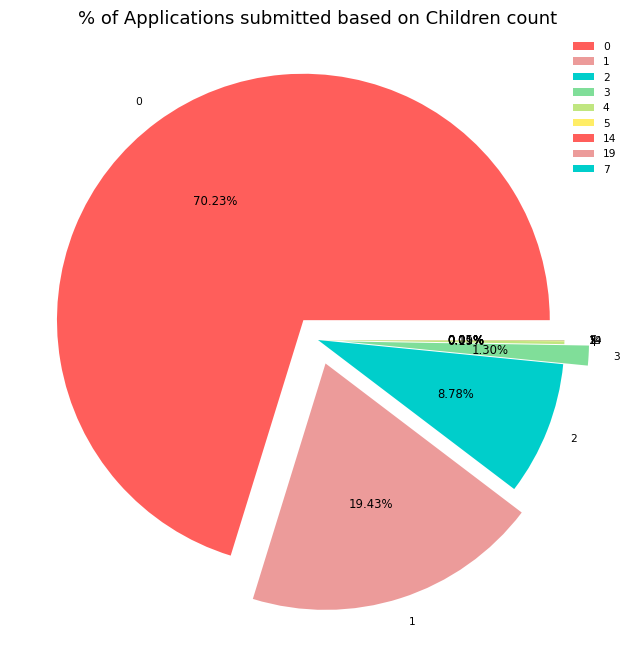

In [ ]:
plt.figure(figsize = (8,8))
plt.pie(new_df['Num_children'].value_counts(), labels=new_df['Num_children'].value_counts().index,explode = [0.1,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0],autopct='%1.2f%%')
plt.title('% of Applications submitted based on Children count')
plt.legend()
plt.show()

In [ ]:
new_df.columns

Index(['ID', 'Gender', 'Own_car', 'Own_property', 'Num_children',
       'Total_income', 'Income_type', 'Education_type', 'Family_status',
       'Housing_type', 'Work_phone', 'Phone', 'Email', 'Occupation_type',
       'Num_family', 'Target', 'Account_length', 'Age', 'Unemployed',
       'Years_employed', 'Is_Working', 'Marital_status', 'Is_working',
       'Household_Size'],
      dtype='object')

In [ ]:
new_df = new_df.loc[:,['ID', 'Gender', 'Own_car', 'Own_property', 'Num_children',
       'Total_income', 'Income_type', 'Education_type', 'Family_status',
       'Housing_type', 'Work_phone', 'Phone', 'Email', 'Occupation_type',
       'Num_family', 'Account_length', 'Age', 'Unemployed',
       'Years_employed', 'Is_Working', 'Marital_status', 'Is_working',
       'Household_Size', 'Target']]

In [ ]:
new_df.drop(['ID','Email','Phone'],axis=1,inplace=True)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming new_df is your DataFrame
# Replace 'new_df' with the actual name of your DataFrame if it's different

# Get the names of categorical columns
cat_columns = new_df.select_dtypes(include='object').columns

# Use LabelEncoder to transform each categorical column
le = LabelEncoder()

for col in cat_columns:
    # Convert all values to strings, preserving NaN values
    new_df[col] = new_df[col].astype(str)

    # Apply LabelEncoder
    new_df[col] = le.fit_transform(new_df[col])

# Display the transformed DataFrame
new_df.head()

,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,Work_phone,Occupation_type,Num_family,Account_length,Age,Unemployed,Years_employed,Is_Working,Marital_status,Is_working,Household_Size,Target
0,1,1,1,0,427500.0,4,1,0,0,1,12,2.0,15,33.0,0,12.0,1,0,1,2,1
1,1,1,1,0,112500.0,4,2,0,0,0,17,2.0,29,59.0,0,3.0,1,0,1,2,0
2,0,0,1,0,270000.0,0,2,1,0,0,15,1.0,4,52.0,0,8.0,1,1,1,1,0
3,0,0,1,0,283500.0,1,1,1,0,0,12,1.0,20,62.0,1,0.0,0,1,0,1,0
4,1,1,1,0,270000.0,4,1,0,0,1,0,2.0,5,46.0,0,2.0,1,0,1,2,0


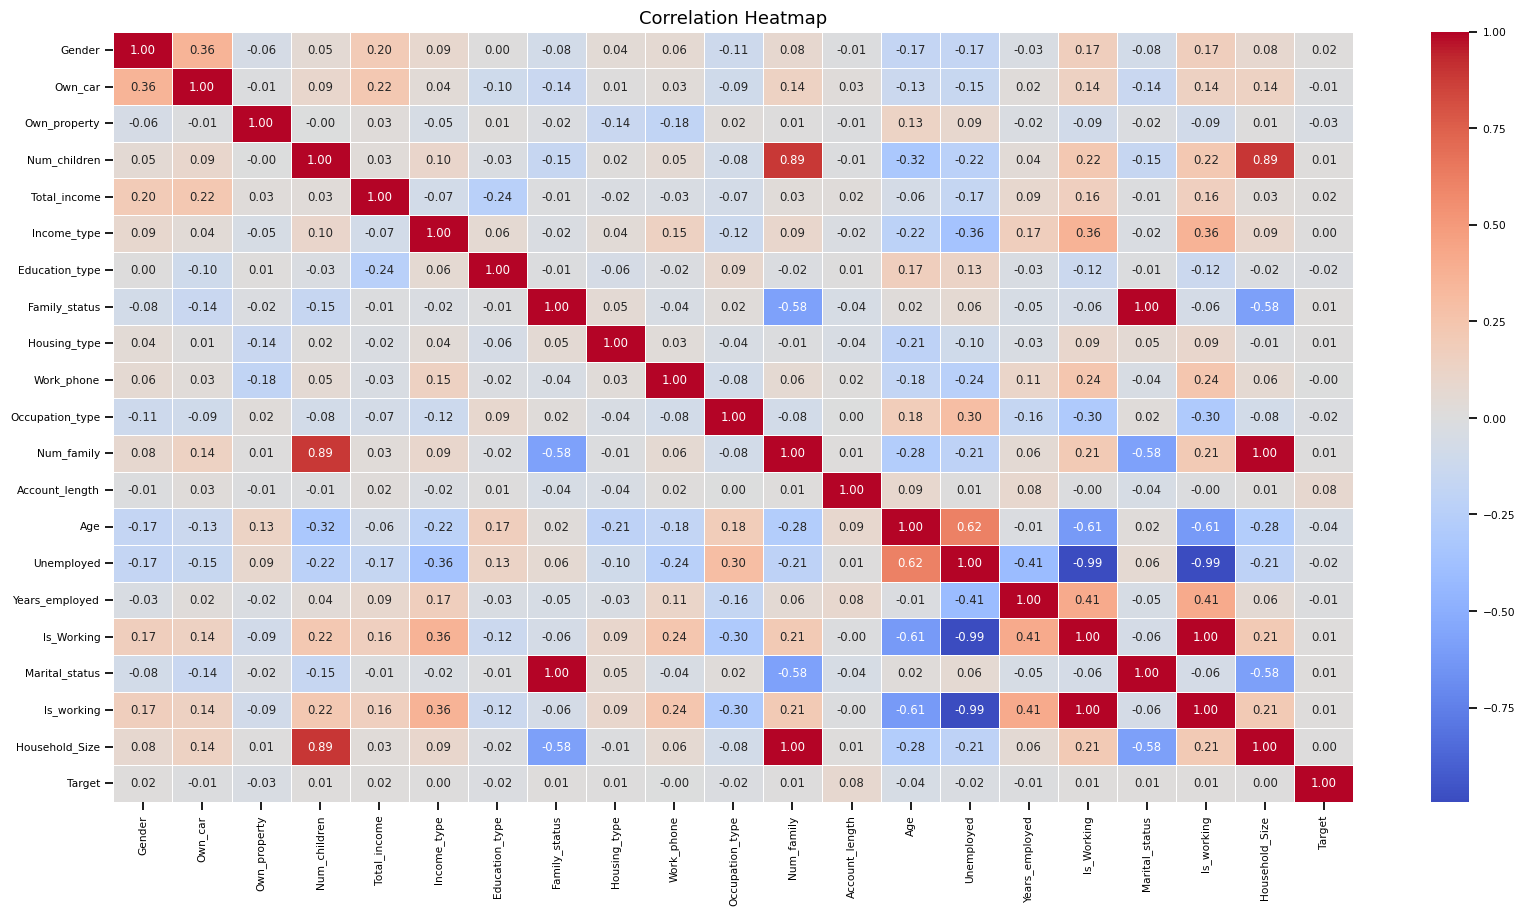

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming new_df is your DataFrame
# Replace 'new_df' with the actual name of your DataFrame if it's different

# Create a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

we can clearly  see that the num_children and num_family so can drop the one do the the columns because they are showing the correlation with each other

In [ ]:
new_df.drop(['Num_family'],axis=1,inplace= True)

In [ ]:
new_df.drop(['Is_Working'],axis=1,inplace= True)

In [ ]:
new_df.drop(['Num_children'],axis=1,inplace= True)

In [ ]:
new_df.drop(['Family_status'],axis=1,inplace= True)

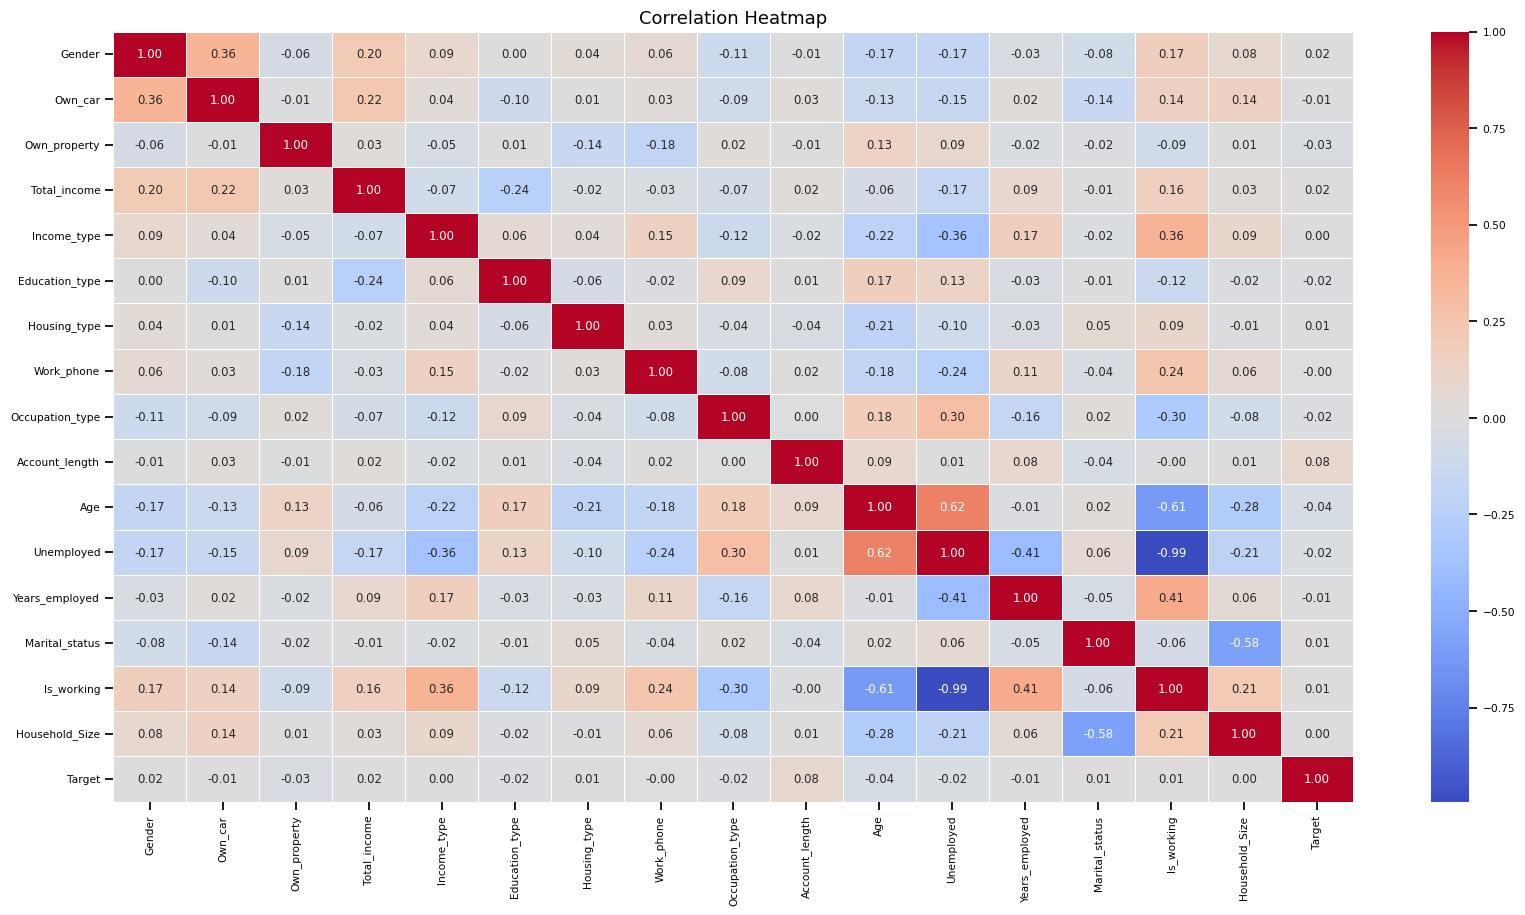

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming new_df is your DataFrame
# Replace 'new_df' with the actual name of your DataFrame if it's different

# Create a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
x=new_df.iloc[:,:-1]
y=new_df.iloc[:,-1]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x)
x=scaler.transform(x)

In [ ]:
#Running a basic model
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=10)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(7767, 12)
(7767,)
(1942, 12)
(1942,)


In [ ]:
from sklearn.linear_model import LogisticRegression
#create a model object
classifier = LogisticRegression()
#train the model object
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
print(Y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the modle: ",acc)

[[1673    0]
 [ 269    0]]
Classification report: 
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1673
           1       0.00      0.00      0.00       269

    accuracy                           0.86      1942
   macro avg       0.43      0.50      0.46      1942
weighted avg       0.74      0.86      0.80      1942

Accuracy of the modle:  0.8614830072090628


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have a dataset with features (X) and labels (y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN model with a specified number of neighbors (e.g., 5)
knn_model = KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),metric='euclidean')

# Train the model on the training data
knn_model.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = knn_model.predict(X_test)

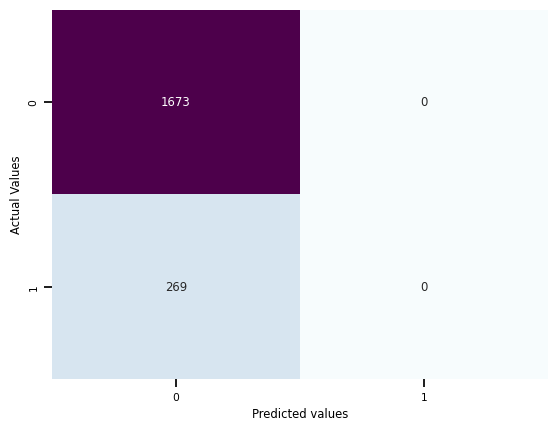

Classification report: 
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1673
           1       0.00      0.00      0.00       269

    accuracy                           0.86      1942
   macro avg       0.43      0.50      0.46      1942
weighted avg       0.74      0.86      0.80      1942

Accuracy of the modle:  0.8614830072090628


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt= 'g', cbar= False, cmap= 'BuPu')
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the modle: ",acc)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have a dataset with features (X) and labels (y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree model
decision_tree_model = DecisionTreeClassifier(criterion='gini',max_depth=15,random_state=10)

# Train the model on the training data
decision_tree_model.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = decision_tree_model.predict(X_test)


because the there is an imbalance in data it shows higher percentage towards 0 class and ignores the 1 class because it as lower percentage so it wil be baised towards to the 0 class

[[1673    0]
 [ 269    0]]


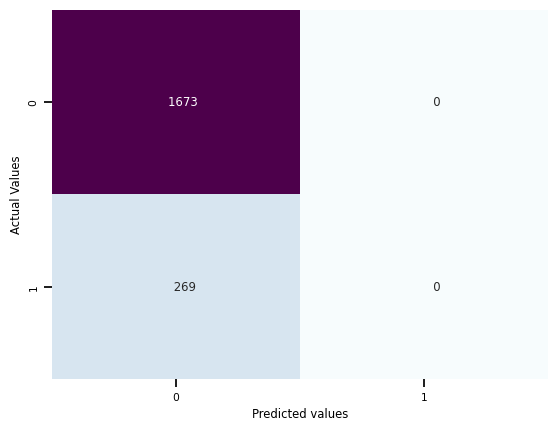

Classification report: 
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1673
           1       0.00      0.00      0.00       269

    accuracy                           0.86      1942
   macro avg       0.43      0.50      0.46      1942
weighted avg       0.74      0.86      0.80      1942

Accuracy of the modle:  0.8614830072090628


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

sns.heatmap(cfm, annot=True, fmt='8', cbar=False, cmap='BuPu')
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the modle: ",acc)

In [ ]:
feature_imp = pd.Series(decision_tree_model.feature_importances_, index=x.columns.tolist()).sort_values(ascending=False)

# Plotting the feature importances
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.title('Visualizing Feature Importance')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Assuming you have a dataset with features (X) and labels (y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=65,random_state=42)

# Train the model on the training data
random_forest_model.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = random_forest_model.predict(X_test)

[[1673    0]
 [ 269    0]]


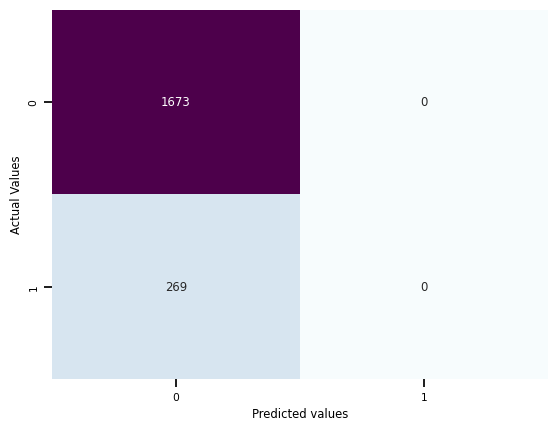

Classification report: 
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1673
           1       0.00      0.00      0.00       269

    accuracy                           0.86      1942
   macro avg       0.43      0.50      0.46      1942
weighted avg       0.74      0.86      0.80      1942

Accuracy of the modle:  0.8614830072090628


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the modle: ",acc)

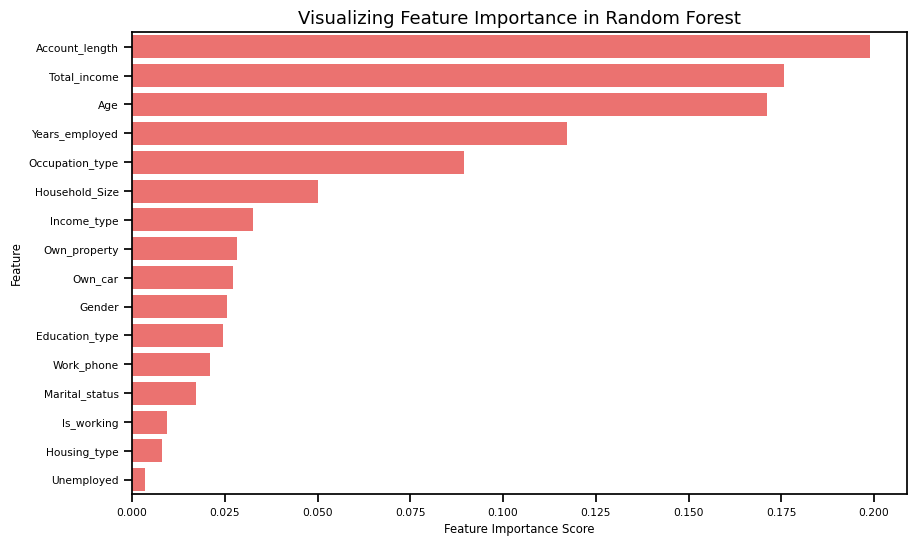

In [ ]:
feature_imp = pd.Series(random_forest_model.feature_importances_, index=x.columns.tolist()).sort_values(ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.title('Visualizing Feature Importance in Random Forest')
plt.show()

In [ ]:
new_df.drop(['Own_car'],axis=1,inplace= True)

In [ ]:
new_df.drop(['Own_property'],axis=1,inplace= True)

In [ ]:
new_df.drop(['Housing_type'],axis=1,inplace= True)

In [ ]:
new_df.drop(['Unemployed'],axis=1,inplace= True)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have a dataset with features (X) and labels (y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an Extra Trees Classifier
extra_trees_model = ExtraTreesClassifier(n_estimators=50,random_state=10)

# Train the model on the training data
extra_trees_model.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = extra_trees_model.predict(X_test)



[[1673    0]
 [ 269    0]]


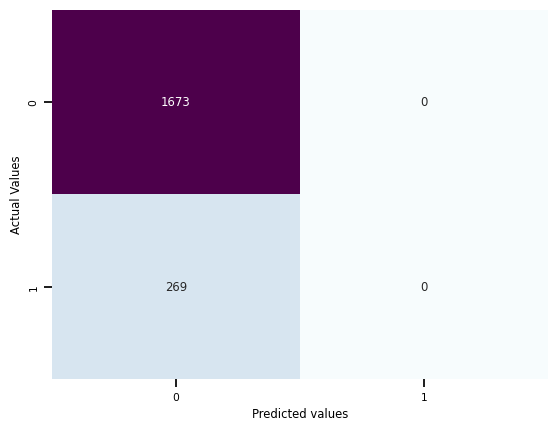

Classification report: 
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1673
           1       0.00      0.00      0.00       269

    accuracy                           0.86      1942
   macro avg       0.43      0.50      0.46      1942
weighted avg       0.74      0.86      0.80      1942

Accuracy of the modle:  0.8614830072090628


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the modle: ",acc)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


# Assuming you have a dataset with features (X) and labels (y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoost Classifier
adaboost_model = AdaBoostClassifier(base_estimator=
                                    DecisionTreeClassifier(random_state=10),
                                    n_estimators=150,
                                    random_state=10)

# Train the model on the training data
adaboost_model.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = adaboost_model.predict(X_test)

[[1673    0]
 [ 269    0]]


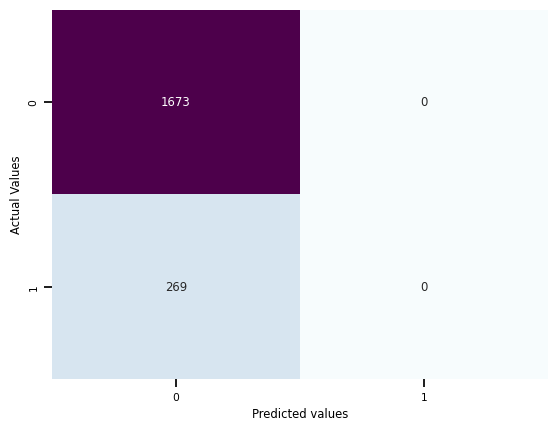

Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1673
           1       0.13      0.01      0.02       269

    accuracy                           0.85      1942
   macro avg       0.50      0.50      0.47      1942
weighted avg       0.76      0.85      0.80      1942

Accuracy of the modle:  0.8527291452111225


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report: ")

print(classification_report(Y_test,y_pred))

acc=accuracy_score(Y_test, y_pred)
print("Accuracy of the modle: ",acc)

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier


# Assuming you have a dataset with features (X) and labels (y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost Classifier
xgb_model = XGBClassifier(random_state=10)

# Train the model on the training data
xgb_model.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)




[[1673    0]
 [ 269    0]]


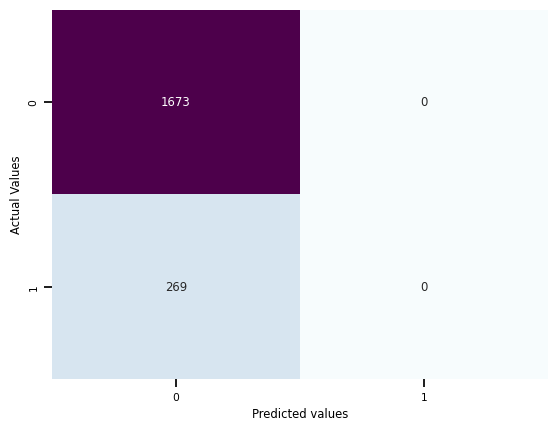

Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1673
           1       0.13      0.01      0.02       269

    accuracy                           0.85      1942
   macro avg       0.50      0.50      0.47      1942
weighted avg       0.76      0.85      0.80      1942

Accuracy of the modle:  0.8527291452111225


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report: ")

print(classification_report(Y_test,y_pred))

acc=accuracy_score(Y_test, y_pred)
print("Accuracy of the modle: ",acc)

In [ ]:
import sklearn.utils._param_validation

In [ ]:
import imblearn